In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from scipy.stats import linregress
from config import tmdb_api_key
from config import omdb_api_key
import json
import numpy as np
import cpi

In [2]:
# Check that the CSV was read properly
movie_list = pd.read_csv("movies.csv")
movie_list.head()

,Title
0,The Shawshank Redemption
1,The Godfather
2,The Dark Knight
3,The Godfather Part II
4,12 Angry Men


In [3]:
# Add id column to the DataFrame
movie_list['id'] = ''
movie_list

,Title,id
0,The Shawshank Redemption,
1,The Godfather,
2,The Dark Knight,
3,The Godfather Part II,
4,12 Angry Men,
...,...,...
245,Jai Bhim,
246,Aladdin,
247,Gandhi,
248,The Help,


In [4]:
# TMDB API call
movie=movie_list['Title'][100]
base_url="https://api.themoviedb.org/3/search/movie?"
build_url = f'https://api.themoviedb.org/3/search/movie?query={movie}&api_key={tmdb_api_key}'
response=requests.get(build_url).json()
#print(response.url)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "page": 1,
    "results": [
        {
            "adult": false,
            "backdrop_path": "/yIonSXf1jdNihhK8PssxO6KCIfz.jpg",
            "genre_ids": [
                878,
                18
            ],
            "id": 185,
            "original_language": "en",
            "original_title": "A Clockwork Orange",
            "overview": "In a near-future Britain, young Alexander DeLarge and his pals get their kicks beating and raping anyone they please. When not destroying the lives of others, Alex swoons to the music of Beethoven. The state, eager to crack down on juvenile crime, gives an incarcerated Alex the option to undergo an invasive procedure that'll rob him of all personal agency. In a time when conscience is a commodity, can Alex change his tune?",
            "popularity": 36.926,
            "poster_path": "/4sHeTAp65WrSSuc05nRBKddhBxO.jpg",
            "release_date": "1971-12-19",
            "title": "A Clockwork Orange",
            "video": false,
   

In [5]:
#response['results'][0]['id']

In [6]:
#OMDB API call
url = "http://www.omdbapi.com/?t="
#api_key = "&apikey=" + api_key
api_key_url = "&apikey=" + omdb_api_key
#print(api_key_url)
response = requests.get(url + "Jack Reacher" + api_key_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "Actors": "Tom Cruise, Rosamund Pike, Richard Jenkins",
    "Awards": "1 win & 6 nominations",
    "BoxOffice": "$80,070,736",
    "Country": "United States",
    "DVD": "31 Dec 2014",
    "Director": "Christopher McQuarrie",
    "Genre": "Action, Mystery, Thriller",
    "Language": "English",
    "Metascore": "50",
    "Plot": "A homicide investigator digs deeper into a case involving a trained military sniper responsible for a mass shooting.",
    "Poster": "https://m.media-amazon.com/images/M/MV5BMTM1NjUxMDI3OV5BMl5BanBnXkFtZTcwNjg1ODM3OA@@._V1_SX300.jpg",
    "Production": "N/A",
    "Rated": "PG-13",
    "Ratings": [
        {
            "Source": "Internet Movie Database",
            "Value": "7.0/10"
        },
        {
            "Source": "Rotten Tomatoes",
            "Value": "63%"
        },
        {
            "Source": "Metacritic",
            "Value": "50/100"
        }
    ],
    "Released": "21 Dec 2012",
    "Response": "True",
    "Runtime": "130 min",
 

In [7]:
# Loop through the CSV's Title column to call said movie from the API
# Create an empty list to store unfound movies in the TMDB database into
unfound_movies = []
for index, row in movie_list.iterrows():
    movie=movie_list['Title'][index]
    base_url="https://api.themoviedb.org/3/search/movie?"
    build_url = f'{base_url}query={movie}&api_key={tmdb_api_key}'
    response=requests.get(build_url).json()
    #print(response.url)

    try:
        movie_list.loc[index, "id"] = response['results'][0]['id']
    except (KeyError, IndexError):
        # If no movie name is found, set the movie id as NaN .
        movie_list.loc[index, "id"] = np.nan
        unfound_movies.append(movie_list.loc[index, "Title"])

In [8]:
# View the movies not found in the database
unfound_movies

['Gisaengchung', 'Oldeuboi', 'Capharnaüm']

In [9]:
#Print the DataFrame along with it's shape
print(movie_list.shape)
movie_list

(250, 2)


,Title,id
0,The Shawshank Redemption,278
1,The Godfather,238
2,The Dark Knight,155
3,The Godfather Part II,240
4,12 Angry Men,389
...,...,...
245,Jai Bhim,855400
246,Aladdin,420817
247,Gandhi,783
248,The Help,50014


In [10]:
# Export the City_Data into a csv
#movie_list.to_csv("movie_list.csv")

In [11]:
# movie_list_df = movie_list.loc[movie_list['id']=='NaN']
# movie_list_df

In [12]:
#Drop NaN rows
movie_list.dropna(how='any',inplace=True)

In [13]:
#Check size of Data Frame
movie_list.shape

(247, 2)

In [14]:
#Add columns name to the DataFrame
movie_list[['imdb_id',
            'budget',
            'genres',
            'revenue',
            'runtime',
            'popularity',
            'release_date',
            'production_countries'
            ,'tmdb_rating']] =''
movie_list

,Title,id,imdb_id,budget,genres,revenue,runtime,popularity,release_date,production_countries,tmdb_rating
0,The Shawshank Redemption,278,,,,,,,,,
1,The Godfather,238,,,,,,,,,
2,The Dark Knight,155,,,,,,,,,
3,The Godfather Part II,240,,,,,,,,,
4,12 Angry Men,389,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
245,Jai Bhim,855400,,,,,,,,,
246,Aladdin,420817,,,,,,,,,
247,Gandhi,783,,,,,,,,,
248,The Help,50014,,,,,,,,,


In [15]:
# # Defining the path for each column value

#imdb_id = url_byid_response['imdb_id']
#release_date = url_byid_response['release_date']
#url_byid_response['revenue']
#url_byid_response['runtime']

# #extracting genre names from list
# for i in range(0,len(url_byid_response['genres'])):
#     print(url_byid_response['genres'][i]['name'])

# #extracting genre names from list
# for i in range(0,len(url_byid_response['production_countries'])):
#     print(url_byid_response['production_countries'][i]['name'])

#url_byid_response['popularity']
#url_byid_response['budget']

#url_byid_response['vote_average']


In [16]:
# #API call, search movie by ID
# for i in range(0,len(movie_list['Title']))
#     movie_id=movie_list['id'][i]
#     url_ById = "https://api.themoviedb.org/3/movie/"
#     build_url_ById=f"{url_ById}{movie_id}?api_key={api_key}"
#     url_byid_response=requests.get(build_url_ById).json()
#     #print(json.dumps(url_byid_response, indent=4, sort_keys=True))

In [17]:
# Loop through each movie's title for the API call and store the data we want to analyze into our DataFrame

for index, row in movie_list.iterrows():
# Create empty lists to store multiple-value columns' data into 
    genres = []
    production_countries = []
    try:
        movie_id=movie_list['id'][index]
        base_url_ById = "https://api.themoviedb.org/3/movie/"
        build_url_ById=f"{base_url_ById}{movie_id}?api_key={tmdb_api_key}"
        url_byid_response=requests.get(build_url_ById).json()
        movie_list.loc[index, "imdb_id"] = url_byid_response['imdb_id']
        movie_list.loc[index, "release_date"] = url_byid_response['release_date']
        movie_list.loc[index, "revenue"] = url_byid_response['revenue']
        movie_list.loc[index, "runtime"]= url_byid_response['runtime']
        movie_list.loc[index, "Title"]= url_byid_response['title']

        
        
        #extracting genre names from list
        for i in range(0,len(url_byid_response['genres'])):
            current_genre = url_byid_response['genres'][i]['name']
            genres.append(current_genre)
            

        #extracting production_countries names from list
        for i in range(0,len(url_byid_response['production_countries'])):
            current_prod_country = url_byid_response['production_countries'][i]['name']
            production_countries.append(current_prod_country)

        movie_list.loc[index, "popularity"] = url_byid_response['popularity']
        movie_list.loc[index, "budget"] = url_byid_response['budget']
        movie_list.loc[index, "tmdb_rating"] = url_byid_response['vote_average']
        movie_list.loc[index, "genres"] = ", ".join(genres)
        movie_list.loc[index, "production_countries"] = ", ".join(production_countries)
    except (KeyError, IndexError):
        # If no movie name is found, set the movie id as NaN .
        movie_list.loc[index, "imdb_id"] = np.nan
        movie_list.loc[index, "release_date"] = np.nan
        movie_list.loc[index, "revenue"] = np.nan
        movie_list.loc[index, "runtime"]= np.nan
        movie_list.loc[index, "popularity"] = np.nan
        movie_list.loc[index, "budget"] = np.nan
        movie_list.loc[index, "tmdb_rating"] = np.nan
        movie_list.loc[index, "production_countries"] = np.nan
        movie_list.loc[index, "genres"] = np.nan

        

In [18]:
movie_list.head()

,Title,id,imdb_id,budget,genres,revenue,runtime,popularity,release_date,production_countries,tmdb_rating
0,The Shawshank Redemption,278,tt0111161,25000000,"Drama, Crime",28341469,142,124.168,1994-09-23,United States of America,8.703
1,The Godfather,238,tt0068646,6000000,"Drama, Crime",245066411,175,118.372,1972-03-14,United States of America,8.709
2,The Dark Knight,155,tt0468569,185000000,"Drama, Action, Crime, Thriller",1004558444,152,93.061,2008-07-16,"United Kingdom, United States of America",8.512
3,The Godfather Part II,240,tt0071562,13000000,"Drama, Crime",102600000,202,61.918,1974-12-20,United States of America,8.591
4,12 Angry Men,389,tt0050083,350000,Drama,1000000,97,45.848,1957-04-10,United States of America,8.54


In [19]:
movie_list.shape

(247, 11)

In [20]:
# Create a new "Year" column from the "release date" by making a new df converting to datetime
movie_list["release_date"] = pd.to_datetime(movie_list["release_date"])
movie_list["Year"] = movie_list["release_date"].dt.year
# movie_list.drop("release_date", axis=1, inplace=True)
movie_list=movie_list[["Title", "Year", "id", "imdb_id", "genres", "runtime", "budget", "revenue", "production_countries",
           "popularity", "tmdb_rating"]]
movie_list

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating
0,The Shawshank Redemption,1994,278,tt0111161,"Drama, Crime",142,25000000,28341469,United States of America,124.168,8.703
1,The Godfather,1972,238,tt0068646,"Drama, Crime",175,6000000,245066411,United States of America,118.372,8.709
2,The Dark Knight,2008,155,tt0468569,"Drama, Action, Crime, Thriller",152,185000000,1004558444,"United Kingdom, United States of America",93.061,8.512
3,The Godfather Part II,1974,240,tt0071562,"Drama, Crime",202,13000000,102600000,United States of America,61.918,8.591
4,12 Angry Men,1957,389,tt0050083,Drama,97,350000,1000000,United States of America,45.848,8.54
...,...,...,...,...,...,...,...,...,...,...,...
245,Jai Bhim,2021,855400,tt15097216,"Crime, Drama, Mystery",164,0,0,India,9.343,7.424
246,Aladdin,2019,420817,tt6139732,"Adventure, Fantasy, Romance, Family",127,183000000,1054304000,United States of America,54.419,7.113
247,Gandhi,1982,783,tt0083987,"Drama, History",191,22000000,77737889,"India, United Kingdom, United States of America",13.73,7.544
248,The Help,2011,50014,tt1454029,Drama,146,25000000,216639112,"India, United Arab Emirates, United States of ...",64.75,8.202


In [21]:
# # Export the movie_df into a csv
# movie_list.to_csv("movie_df.csv")

In [22]:
# View if a movie had 0 budget or not (true/false)
no_budget = movie_list["budget"]==0
# null_imdb_id = movie_list.loc[movie_list]
no_budget

0      False
1      False
2      False
3      False
4      False
       ...  
245     True
246    False
247    False
248    False
249    False
Name: budget, Length: 247, dtype: bool

In [23]:
# Create a DataFrame from the last block's result
no_budget_df = movie_list[no_budget]
# len(no_budget_df["budget"])
# no_budget_df

In [24]:
# View how many movies with no budget had no revenue either
# no_revenue = no_budget_df["revenue"]==0
# no_revenue.value_counts()

In [25]:
# Removing rows with zero budget movies
movie_list=movie_list[~no_budget]
movie_list

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating
0,The Shawshank Redemption,1994,278,tt0111161,"Drama, Crime",142,25000000,28341469,United States of America,124.168,8.703
1,The Godfather,1972,238,tt0068646,"Drama, Crime",175,6000000,245066411,United States of America,118.372,8.709
2,The Dark Knight,2008,155,tt0468569,"Drama, Action, Crime, Thriller",152,185000000,1004558444,"United Kingdom, United States of America",93.061,8.512
3,The Godfather Part II,1974,240,tt0071562,"Drama, Crime",202,13000000,102600000,United States of America,61.918,8.591
4,12 Angry Men,1957,389,tt0050083,Drama,97,350000,1000000,United States of America,45.848,8.54
...,...,...,...,...,...,...,...,...,...,...,...
244,The Handmaiden,2016,290098,tt4016934,"Thriller, Drama, Romance",145,8575000,38600000,South Korea,41.685,8.245
246,Aladdin,2019,420817,tt6139732,"Adventure, Fantasy, Romance, Family",127,183000000,1054304000,United States of America,54.419,7.113
247,Gandhi,1982,783,tt0083987,"Drama, History",191,22000000,77737889,"India, United Kingdom, United States of America",13.73,7.544
248,The Help,2011,50014,tt1454029,Drama,146,25000000,216639112,"India, United Arab Emirates, United States of ...",64.75,8.202


In [26]:
# View if a movie had 0 budget or not (true/false)
movie_list["budget"].min()


133000

In [27]:
# View if a movie had 0 revenue or not (true/false)
no_revenue_1 = movie_list["revenue"]==0
# null_imdb_id = movie_list.loc[movie_list]
no_revenue_1

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
246    False
247    False
248    False
249    False
Name: revenue, Length: 223, dtype: bool

In [28]:
# Removing rows with zero revenue movies
movie_list=movie_list[~no_revenue_1]
movie_list

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating
0,The Shawshank Redemption,1994,278,tt0111161,"Drama, Crime",142,25000000,28341469,United States of America,124.168,8.703
1,The Godfather,1972,238,tt0068646,"Drama, Crime",175,6000000,245066411,United States of America,118.372,8.709
2,The Dark Knight,2008,155,tt0468569,"Drama, Action, Crime, Thriller",152,185000000,1004558444,"United Kingdom, United States of America",93.061,8.512
3,The Godfather Part II,1974,240,tt0071562,"Drama, Crime",202,13000000,102600000,United States of America,61.918,8.591
4,12 Angry Men,1957,389,tt0050083,Drama,97,350000,1000000,United States of America,45.848,8.54
...,...,...,...,...,...,...,...,...,...,...,...
244,The Handmaiden,2016,290098,tt4016934,"Thriller, Drama, Romance",145,8575000,38600000,South Korea,41.685,8.245
246,Aladdin,2019,420817,tt6139732,"Adventure, Fantasy, Romance, Family",127,183000000,1054304000,United States of America,54.419,7.113
247,Gandhi,1982,783,tt0083987,"Drama, History",191,22000000,77737889,"India, United Kingdom, United States of America",13.73,7.544
248,The Help,2011,50014,tt1454029,Drama,146,25000000,216639112,"India, United Arab Emirates, United States of ...",64.75,8.202


In [29]:
# View if a movie had 0 revenue or not (true/false)
movie_list["revenue"].min()


96568

In [30]:
# Adjusting for inflation over the years
budget_past = 438656843
budget_year = 1991
budget_2023 = cpi.inflate(budget_past, budget_year)
round(budget_2023, 2)

942548593.16

In [31]:
movie_list['infl_adj_budget'] = ''
movie_list['infl_adj_revenue'] = ''
movie_list

/var/folders/_2/7g_mshsj32ndtynd6y83mpgr0000gn/T/ipykernel_77353/2093040814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list['infl_adj_budget'] = ''
/var/folders/_2/7g_mshsj32ndtynd6y83mpgr0000gn/T/ipykernel_77353/2093040814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list['infl_adj_revenue'] = ''


,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue
0,The Shawshank Redemption,1994,278,tt0111161,"Drama, Crime",142,25000000,28341469,United States of America,124.168,8.703,,
1,The Godfather,1972,238,tt0068646,"Drama, Crime",175,6000000,245066411,United States of America,118.372,8.709,,
2,The Dark Knight,2008,155,tt0468569,"Drama, Action, Crime, Thriller",152,185000000,1004558444,"United Kingdom, United States of America",93.061,8.512,,
3,The Godfather Part II,1974,240,tt0071562,"Drama, Crime",202,13000000,102600000,United States of America,61.918,8.591,,
4,12 Angry Men,1957,389,tt0050083,Drama,97,350000,1000000,United States of America,45.848,8.54,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,The Handmaiden,2016,290098,tt4016934,"Thriller, Drama, Romance",145,8575000,38600000,South Korea,41.685,8.245,,
246,Aladdin,2019,420817,tt6139732,"Adventure, Fantasy, Romance, Family",127,183000000,1054304000,United States of America,54.419,7.113,,
247,Gandhi,1982,783,tt0083987,"Drama, History",191,22000000,77737889,"India, United Kingdom, United States of America",13.73,7.544,,
248,The Help,2011,50014,tt1454029,Drama,146,25000000,216639112,"India, United Arab Emirates, United States of ...",64.75,8.202,,


In [32]:
# Defining a function to calculate a running inflation adjusted value for a column in a dataframe
def inflate_column(data, column):
    #     Adjust for inflation the series of values in column of the dataframe data
    return data.apply(lambda x: cpi.inflate(x[column], x.Year), axis=1)

# adjust the production budget 
movie_list['budget'] = movie_list['budget'].astype(int)
movie_list['infl_adj_budget'] = inflate_column(movie_list, 'budget')
#adjust the worldwide gross profits
movie_list['infl_adj_revenue'] = inflate_column(movie_list, 'revenue').astype(float)

# calculate the real worldwide net profit
movie_list['real_profit'] = movie_list.apply(lambda x: x.infl_adj_revenue - x.infl_adj_budget, axis=1)
movie_list

/var/folders/_2/7g_mshsj32ndtynd6y83mpgr0000gn/T/ipykernel_77353/235147128.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list['budget'] = movie_list['budget'].astype(int)
/var/folders/_2/7g_mshsj32ndtynd6y83mpgr0000gn/T/ipykernel_77353/235147128.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list['infl_adj_budget'] = inflate_column(movie_list, 'budget')
/var/folders/_2/7g_mshsj32ndtynd6y83mpgr0000gn/T/ipykernel_77353/235147128.py:10: SettingWithCopyWarning: 
A value is trying to be se

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit
0,The Shawshank Redemption,1994,278,tt0111161,"Drama, Crime",142,25000000,28341469,United States of America,124.168,8.703,4.936825e+07,5.596675e+07,6.598499e+06
1,The Godfather,1972,238,tt0068646,"Drama, Crime",175,6000000,245066411,United States of America,118.372,8.709,4.200789e+07,1.715787e+09,1.673779e+09
2,The Dark Knight,2008,155,tt0468569,"Drama, Action, Crime, Thriller",152,185000000,1004558444,"United Kingdom, United States of America",93.061,8.512,2.514650e+08,1.365467e+09,1.114002e+09
3,The Godfather Part II,1974,240,tt0071562,"Drama, Crime",202,13000000,102600000,United States of America,61.918,8.591,7.717069e+07,6.090548e+08,5.318841e+08
4,12 Angry Men,1957,389,tt0050083,Drama,97,350000,1000000,United States of America,45.848,8.54,3.645169e+06,1.041477e+07,6.769600e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,The Handmaiden,2016,290098,tt4016934,"Thriller, Drama, Romance",145,8575000,38600000,South Korea,41.685,8.245,1.045601e+07,4.706731e+07,3.661129e+07
246,Aladdin,2019,420817,tt6139732,"Adventure, Fantasy, Romance, Family",127,183000000,1054304000,United States of America,54.419,7.113,2.094833e+08,1.206880e+09,9.973968e+08
247,Gandhi,1982,783,tt0083987,"Drama, History",191,22000000,77737889,"India, United Kingdom, United States of America",13.73,7.544,6.671927e+07,2.357553e+08,1.690360e+08
248,The Help,2011,50014,tt1454029,Drama,146,25000000,216639112,"India, United Arab Emirates, United States of ...",64.75,8.202,3.252604e+07,2.818565e+08,2.493305e+08


In [33]:
# Looking at a sampling of dataframe
print(movie_list.shape)
movie_list.sample(5)

(221, 14)


,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit
222,Groundhog Day,1993,137,tt0107048,"Romance, Fantasy, Drama, Comedy",101,14600000,71074049,United States of America,20.906,7.607,2.956929e+07,1.439459e+08,1.143766e+08
19,Seven Samurai,1954,346,tt0047478,"Action, Drama",207,2000000,346300,Japan,39.395,8.45,2.175874e+07,3.767525e+06,-1.799121e+07
33,Léon: The Professional,1994,101,tt0110413,"Crime, Drama, Action",111,16000000,45284974,"United States of America, France",39.498,8.315,3.159568e+07,8.942560e+07,5.782992e+07
29,Back to the Future,1985,105,tt0088763,"Adventure, Comedy, Science Fiction",116,19000000,381109762,United States of America,60.349,8.313,5.167700e+07,1.036558e+09,9.848813e+08
56,Django Unchained,2012,68718,tt1853728,"Drama, Western",165,100000000,425368238,United States of America,42.09,8.171,1.274663e+08,5.422012e+08,4.147349e+08


In [34]:
# #OMDB API call
# url = "http://www.omdbapi.com/?t="
# #api_key = "&apikey=" + api_key
# api_key_url = "&apikey=" + omdb_api_key
# #print(api_key_url)
# response = requests.get(url + "Jack Reacher" + api_key_url).json()
# print(json.dumps(response, indent=4, sort_keys=True))

In [35]:
for index, row in movie_list.iterrows():
    try:
        imdb_id=movie_list["imdb_id"][index]
        base_url_ById = "http://www.omdbapi.com/?i="
        build_url_ById=f"{base_url_ById}{imdb_id}&apikey={omdb_api_key}"
        url_byid_response=requests.get(build_url_ById).json()
        movie_list.loc[index, "imdb_rating"] = url_byid_response['imdbRating']
        movie_list.loc[index, "imdb_votes"] = url_byid_response['imdbVotes']
    except:
        movie_list.loc[index, "imdb_rating"] = np.nan
        movie_list.loc[index, "imdb_votes"] = np.nan
movie_list

/var/folders/_2/7g_mshsj32ndtynd6y83mpgr0000gn/T/ipykernel_77353/2544307824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list.loc[index, "imdb_rating"] = url_byid_response['imdbRating']
/var/folders/_2/7g_mshsj32ndtynd6y83mpgr0000gn/T/ipykernel_77353/2544307824.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list.loc[index, "imdb_votes"] = url_byid_response['imdbVotes']


,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes
0,The Shawshank Redemption,1994,278,tt0111161,"Drama, Crime",142,25000000,28341469,United States of America,124.168,8.703,4.936825e+07,5.596675e+07,6.598499e+06,9.3,"2,802,199"
1,The Godfather,1972,238,tt0068646,"Drama, Crime",175,6000000,245066411,United States of America,118.372,8.709,4.200789e+07,1.715787e+09,1.673779e+09,9.2,"1,954,449"
2,The Dark Knight,2008,155,tt0468569,"Drama, Action, Crime, Thriller",152,185000000,1004558444,"United Kingdom, United States of America",93.061,8.512,2.514650e+08,1.365467e+09,1.114002e+09,9.0,"2,786,837"
3,The Godfather Part II,1974,240,tt0071562,"Drama, Crime",202,13000000,102600000,United States of America,61.918,8.591,7.717069e+07,6.090548e+08,5.318841e+08,9.0,"1,327,261"
4,12 Angry Men,1957,389,tt0050083,Drama,97,350000,1000000,United States of America,45.848,8.54,3.645169e+06,1.041477e+07,6.769600e+06,9.0,"832,893"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,The Handmaiden,2016,290098,tt4016934,"Thriller, Drama, Romance",145,8575000,38600000,South Korea,41.685,8.245,1.045601e+07,4.706731e+07,3.661129e+07,8.1,"163,835"
246,Aladdin,2019,420817,tt6139732,"Adventure, Fantasy, Romance, Family",127,183000000,1054304000,United States of America,54.419,7.113,2.094833e+08,1.206880e+09,9.973968e+08,6.9,"282,377"
247,Gandhi,1982,783,tt0083987,"Drama, History",191,22000000,77737889,"India, United Kingdom, United States of America",13.73,7.544,6.671927e+07,2.357553e+08,1.690360e+08,8.0,"237,597"
248,The Help,2011,50014,tt1454029,Drama,146,25000000,216639112,"India, United Arab Emirates, United States of ...",64.75,8.202,3.252604e+07,2.818565e+08,2.493305e+08,8.1,"480,538"


# Movie Data Analysis

In [36]:
# Define custom bin edges
bin_edges = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]

# Cut the data into custom intervals
movie_list['Decades'] = pd.cut(movie_list['Year'], bins=bin_edges)
movie_list

/var/folders/_2/7g_mshsj32ndtynd6y83mpgr0000gn/T/ipykernel_77353/4147126356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list['Decades'] = pd.cut(movie_list['Year'], bins=bin_edges)


,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades
0,The Shawshank Redemption,1994,278,tt0111161,"Drama, Crime",142,25000000,28341469,United States of America,124.168,8.703,4.936825e+07,5.596675e+07,6.598499e+06,9.3,"2,802,199","(1990, 2000]"
1,The Godfather,1972,238,tt0068646,"Drama, Crime",175,6000000,245066411,United States of America,118.372,8.709,4.200789e+07,1.715787e+09,1.673779e+09,9.2,"1,954,449","(1970, 1980]"
2,The Dark Knight,2008,155,tt0468569,"Drama, Action, Crime, Thriller",152,185000000,1004558444,"United Kingdom, United States of America",93.061,8.512,2.514650e+08,1.365467e+09,1.114002e+09,9.0,"2,786,837","(2000, 2010]"
3,The Godfather Part II,1974,240,tt0071562,"Drama, Crime",202,13000000,102600000,United States of America,61.918,8.591,7.717069e+07,6.090548e+08,5.318841e+08,9.0,"1,327,261","(1970, 1980]"
4,12 Angry Men,1957,389,tt0050083,Drama,97,350000,1000000,United States of America,45.848,8.54,3.645169e+06,1.041477e+07,6.769600e+06,9.0,"832,893","(1950, 1960]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,The Handmaiden,2016,290098,tt4016934,"Thriller, Drama, Romance",145,8575000,38600000,South Korea,41.685,8.245,1.045601e+07,4.706731e+07,3.661129e+07,8.1,"163,835","(2010, 2020]"
246,Aladdin,2019,420817,tt6139732,"Adventure, Fantasy, Romance, Family",127,183000000,1054304000,United States of America,54.419,7.113,2.094833e+08,1.206880e+09,9.973968e+08,6.9,"282,377","(2010, 2020]"
247,Gandhi,1982,783,tt0083987,"Drama, History",191,22000000,77737889,"India, United Kingdom, United States of America",13.73,7.544,6.671927e+07,2.357553e+08,1.690360e+08,8.0,"237,597","(1980, 1990]"
248,The Help,2011,50014,tt1454029,Drama,146,25000000,216639112,"India, United Arab Emirates, United States of ...",64.75,8.202,3.252604e+07,2.818565e+08,2.493305e+08,8.1,"480,538","(2010, 2020]"


In [37]:
# Sorting movie_list df revenue column ascending=False
sorted_revenue_desc = movie_list.sort_values(by='infl_adj_revenue', ascending=False)
top_ten_df = sorted_revenue_desc.iloc[0:10, :] 
top_ten_df

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades
157,Gone with the Wind,1939,770,tt0031381,"Drama, War, Romance",238,4000000,402352579,United States of America,26.658,8.0,8.421727e+07,8.471259e+09,8.387041e+09,8.2,"327,145","(1930, 1940]"
27,Star Wars,1977,11,tt0076759,"Adventure, Action, Science Fiction",121,11000000,775398007,United States of America,83.218,8.204,5.312219e+07,3.744622e+09,3.691500e+09,8.6,"1,415,793","(1970, 1980]"
79,Avengers: Endgame,2019,299534,tt4154796,"Adventure, Science Fiction, Action",181,356000000,2800000000,United States of America,111.005,8.262,4.075194e+08,3.205209e+09,2.797689e+09,8.4,"1,217,571","(2010, 2020]"
225,The Exorcist,1973,9552,tt0070047,Horror,122,12000000,441405644,United States of America,130.218,7.721,7.909595e+07,2.909450e+09,2.830354e+09,8.1,"432,811","(1970, 1980]"
243,The Sound of Music,1965,15121,tt0059742,"Drama, Family, Music, Romance",174,8200000,286214286,United States of America,18.856,7.701,7.618321e+07,2.659112e+09,2.582929e+09,8.1,"249,969","(1960, 1970]"
205,Jaws,1975,578,tt0073195,"Horror, Thriller, Adventure",124,7000000,470653000,United States of America,43.724,7.7,3.807779e+07,2.560204e+09,2.522126e+09,8.1,"641,261","(1970, 1980]"
64,Avengers: Infinity War,2018,299536,tt4154756,"Adventure, Action, Science Fiction",149,300000000,2052415039,United States of America,162.426,8.253,3.496378e+08,2.392006e+09,2.042368e+09,8.4,"1,158,620","(2010, 2020]"
122,Spider-Man: No Way Home,2021,634649,tt10872600,"Action, Adventure, Science Fiction",148,200000000,1921847111,United States of America,147.602,7.988,2.160055e+08,2.075647e+09,1.859642e+09,8.2,"834,385","(2020, 2030]"
14,The Empire Strikes Back,1980,1891,tt0080684,"Adventure, Action, Science Fiction",124,18000000,538400000,United States of America,31.941,8.391,6.392949e+07,1.912202e+09,1.848273e+09,8.7,"1,344,359","(1970, 1980]"
35,The Lion King,2019,420818,tt6105098,"Adventure, Drama, Family",118,260000000,1663075401,"United Kingdom, United States of America",87.488,7.124,2.976265e+08,1.903751e+09,1.606125e+09,6.8,"259,841","(2010, 2020]"


<Axes: title={'center': 'Top 10 Grossing Movies (1922-2022)'}, xlabel='Movie Titles', ylabel='Movie Revenue'>

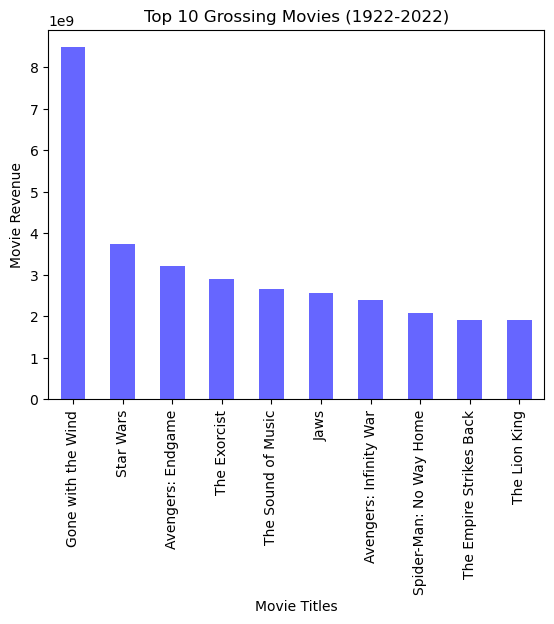

In [38]:
# Create a bar chart to display top 10 grossing movies

top_ten_df.plot("Title", "infl_adj_revenue", kind='bar', alpha=0.6, color='blue', title="Top 10 Grossing Movies (1922-2022)",
                xlabel="Movie Titles", ylabel="Movie Revenue", legend='')


# ax=top_ten_df.plot("Title", "revenue", kind='bar', alpha=0.6, color='blue', title="Top 10 Grossing Movies (1922-2022)",
#                 xlabel="Movie Titles", ylabel="Movie Revenue", legend='')
# ax.set_xticklabels(top_ten_df['Title'], rotation=45)
# plt.show()

<Axes: title={'center': 'Number of Movies per decade'}, xlabel='Decades', ylabel='Number of Movies'>

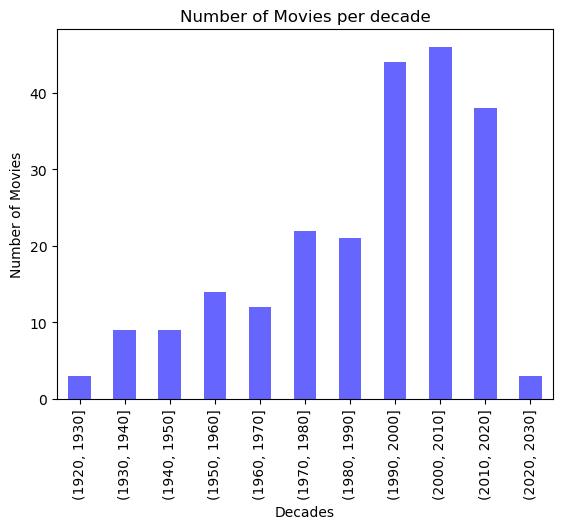

In [39]:
# Create a bar chart based upon the above data
y_axis=movie_list.groupby('Decades').count()['Title']
y_axis.plot(kind='bar', alpha=0.6, color='blue', title="Number of Movies per decade", xlabel="Decades", ylabel="Number of Movies")

## Pie Chart

In [40]:
# Minimum Budget
min_budget = movie_list['infl_adj_budget'].min()
# Average Budget
avg_budget = movie_list['infl_adj_budget'].mean()
# Maximum Budget
max_budget = movie_list['infl_adj_budget'].max()
diff = (max_budget-min_budget)/3
# Define the bins and labels
bins=[min_budget,round(min_budget+diff),round(min_budget+2*diff),round(min_budget+3*diff)]
labels = ['Low Budget', 'Average Budget', 'High Budget']
# Cut the 'Budget' column into categories and create a new column 'Budget_Category'
movie_list['Budget_Category'] = pd.cut(movie_list['infl_adj_budget'], bins=bins, labels=labels)
movie_list.sample(10)

/var/folders/_2/7g_mshsj32ndtynd6y83mpgr0000gn/T/ipykernel_77353/3799777054.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list['Budget_Category'] = pd.cut(movie_list['infl_adj_budget'], bins=bins, labels=labels)


,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades,Budget_Category
249,Beauty and the Beast,1991,10020,tt0101414,"Romance, Family, Animation, Fantasy",84,25000000,424967620,United States of America,72.295,7.733,5.371788e+07,9.131344e+08,8.594165e+08,8.0,"470,835","(1990, 2000]",Low Budget
244,The Handmaiden,2016,290098,tt4016934,"Thriller, Drama, Romance",145,8575000,38600000,South Korea,41.685,8.245,1.045601e+07,4.706731e+07,3.661129e+07,8.1,"163,835","(2010, 2020]",Low Budget
236,La Haine,1995,406,tt0113247,Drama,98,2600000,15300000,France,15.112,8.086,4.992802e+06,2.938072e+07,2.438792e+07,8.1,"187,848","(1990, 2000]",Low Budget
216,Spotlight,2015,314365,tt1895587,"Drama, History",129,20000000,98690254,"Canada, United States of America",15.243,7.813,2.469485e+07,1.218571e+08,9.716221e+07,8.1,"489,777","(2010, 2020]",Low Budget
114,Metropolis,1927,19,tt0017136,"Drama, Science Fiction",149,1300000,650422,Germany,14.7,8.152,2.186503e+07,1.093961e+07,-1.092542e+07,8.3,"180,970","(1920, 1930]",Low Budget
121,1917,2019,530915,tt8579674,"War, Action, Drama",119,100000000,394638258,"India, Spain, United Kingdom, United States of...",30.455,7.991,1.144717e+08,4.517493e+08,3.372775e+08,8.2,"644,097","(2010, 2020]",Low Budget
85,Singin' in the Rain,1952,872,tt0045152,"Comedy, Romance",103,2540800,7200000,United States of America,18.818,8.167,2.805954e+07,7.951381e+07,5.145427e+07,8.3,"253,693","(1950, 1960]",Low Budget
215,The Terminator,1984,218,tt0088247,"Action, Thriller, Science Fiction",108,6400000,78371200,"United Kingdom, United States of America",63.248,7.647,1.802687e+07,2.207481e+08,2.027212e+08,8.1,"902,110","(1980, 1990]",Low Budget
229,The Grapes of Wrath,1940,596,tt0032551,Drama,129,800000,1591000,United States of America,12.172,7.821,1.672314e+07,3.325815e+07,1.653501e+07,8.1,"97,760","(1930, 1940]",Low Budget
184,Gone Girl,2014,210577,tt2267998,"Mystery, Thriller, Drama",149,61000000,369330363,United States of America,121.564,7.893,7.540870e+07,4.565692e+08,3.811605e+08,8.1,"1,032,395","(2010, 2020]",Low Budget


  Budget_Category  count
0      Low Budget    189
1  Average Budget     27
2     High Budget      4


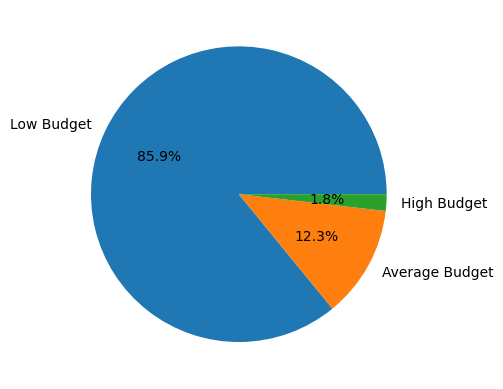

In [41]:
# Pie plot showing the distribution of Budget category using pyplot
budget_distribution = movie_list['Budget_Category'].value_counts().reset_index()
print(budget_distribution)
#create y label
y = [budget_distribution['count'][0],budget_distribution['count'][1],budget_distribution['count'][2]]
#Show Pie Plot
plt.pie(y,autopct='%1.1f%%',labels=['Low Budget','Average Budget','High Budget'])
plt.show()

## Bar Plot

<Figure size 1000x200 with 0 Axes>

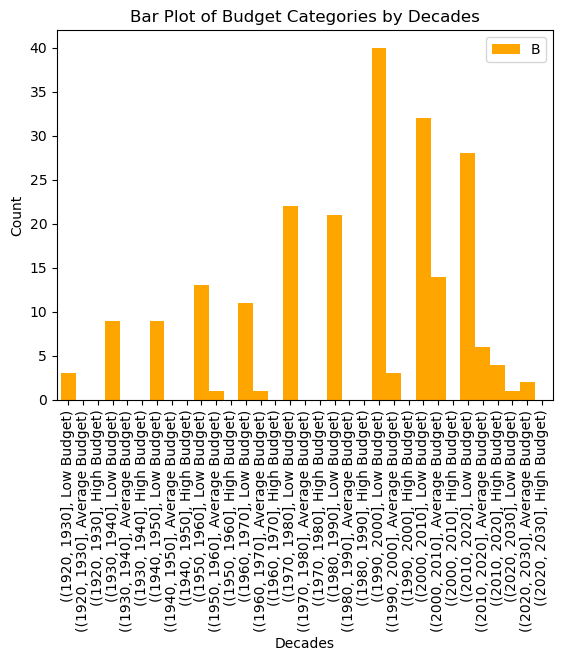

In [42]:
#Bar plot Budget Categories by Decades
grouped_df = movie_list.groupby(['Decades', 'Budget_Category'])['Title'].count().reset_index()
pivot_df=grouped_df.set_index(['Decades', 'Budget_Category'])
# Set the figure size
plt.figure(figsize=(10,2))  # Width, Height in inches
# Create a stacked bar plot
pivot_df.plot(kind='bar',width=1,color='orange', stacked=True)
# Add labels and a title
plt.xlabel('Decades')
plt.ylabel('Count')
plt.title('Bar Plot of Budget Categories by Decades')
plt.legend("Budget")
# Show the plot
plt.show()

## Histogram Plotting

Text(0.5, 1.0, 'Histogram of Budget')

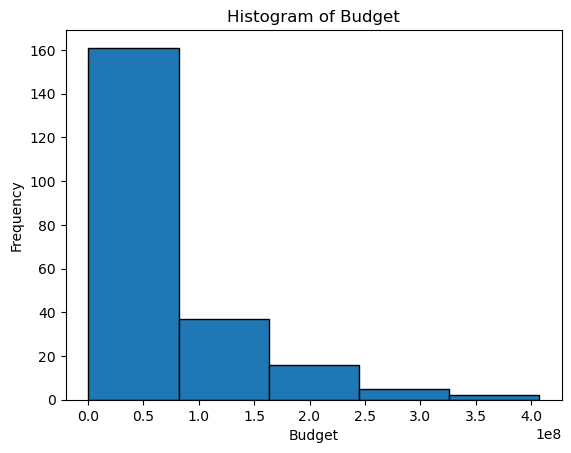

In [43]:
# Plot a histogram of budget
plt.hist(movie_list['infl_adj_budget'],bins=5, edgecolor='k')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Histogram of Budget')

## Scatter Plots with Linear Regression

In [44]:
# Creating a function for computing linear regression
def lin_regress(xval, yval, x_label, y_label): 
    x_values = xval
    y_values = yval
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, c='blueviolet')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(10,20),fontsize=15,color="red")
    plt.legend(['Regression Line: y = {:.2f}x + {:.2f}'.format(slope, intercept)])
    print("The r-value is: ",rvalue)
    plt.show()

The r-value is:  0.010447790724258058


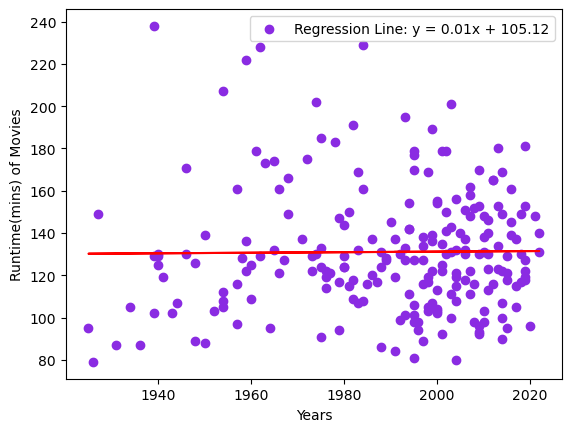

In [45]:
# Create a scatter plot for regression analysis

xval = movie_list['Year']
yval = movie_list['runtime'].astype(int)
x_label='Years'
y_label='Runtime(mins) of Movies'

lin_regress(xval, yval, x_label, y_label)

The r-value is:  -0.0835519714348923


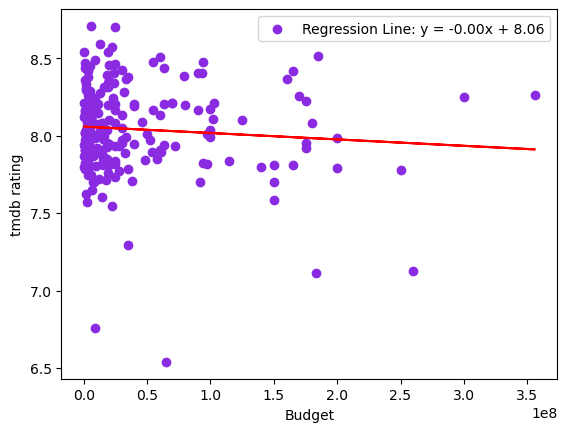

In [46]:
# Create a scatter plot for regression analysis: Budget vs. tmdb

xval = movie_list['budget'].astype(int)
yval = movie_list['tmdb_rating'].astype(float)
x_label='Budget'
y_label='tmdb rating'

lin_regress(xval, yval, x_label, y_label)

The r-value is:  -0.05240744897982019


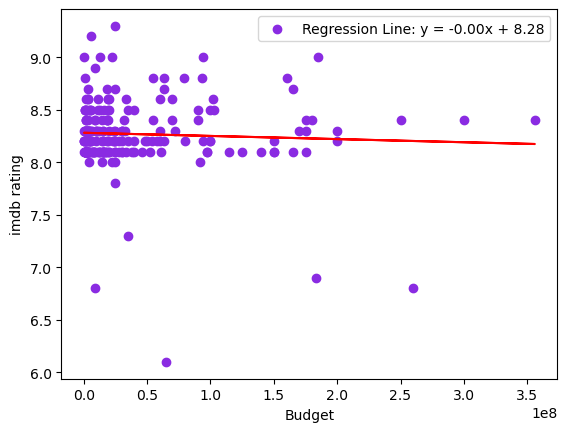

In [47]:
# Create a scatter plot for regression analysis: Budget vs. imbd Rating

xval = movie_list['budget'].astype(int)
yval = movie_list['imdb_rating'].astype(float)
x_label='Budget'
y_label='imdb rating'

lin_regress(xval, yval, x_label, y_label)

The r-value is:  0.028614269228206785


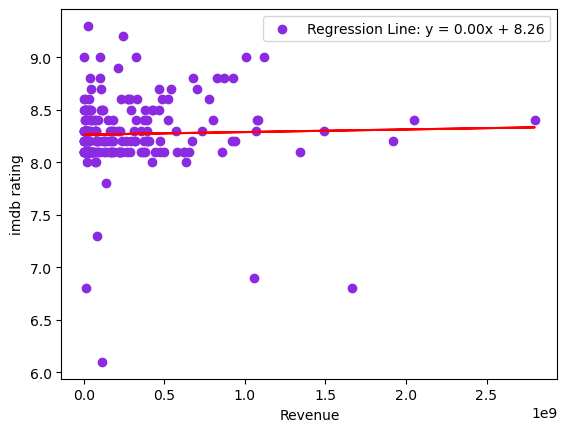

In [48]:
# Create a scatter plot for regression analysis: Revenue vs. imbd Rating

xval = movie_list['revenue'].astype(float)
yval = movie_list['imdb_rating'].astype(float)
x_label='Revenue'
y_label='imdb rating'

lin_regress(xval, yval, x_label, y_label)

The r-value is:  0.14211590762995968


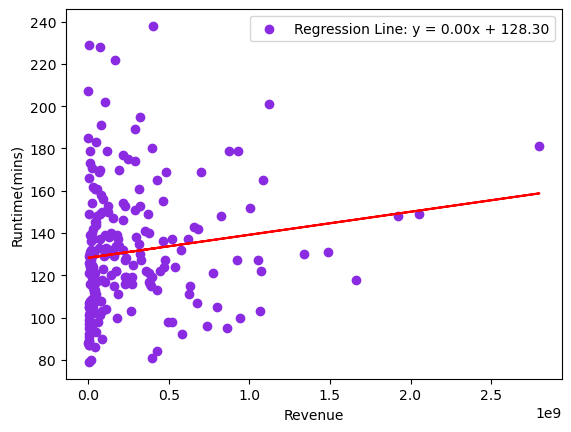

In [49]:
# Create a scatter plot for regression analysis: Revenue vs. Runtime

xval = movie_list['revenue'].astype(float)
yval = movie_list['runtime'].astype(int)
x_label='Revenue'
y_label='Runtime(mins)'

lin_regress(xval, yval, x_label, y_label)

# Data Testing

## 

In [50]:
#TEST NULL HYPOTHESIS(budget and revenue)
#H0: There is a significant association between budget and revenue of a movie.
#H1: There is no significant association between budget and revenue of a movie
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(movie_list['infl_adj_budget'], movie_list['infl_adj_revenue'])

# Perform the chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

alpha = 0.05  # Significance level

if p < alpha:
    print("Accept Null Hypothesis: There is a significant association between budget and revenue of a movie.")
else:
    print("Reject Null Hypothesis:There is no significant association between budget and revenue.")

Chi-Square Statistic: 47072.999999999985
P-value: 0.24293523473139747
Reject Null Hypothesis:There is no significant association between budget and revenue.


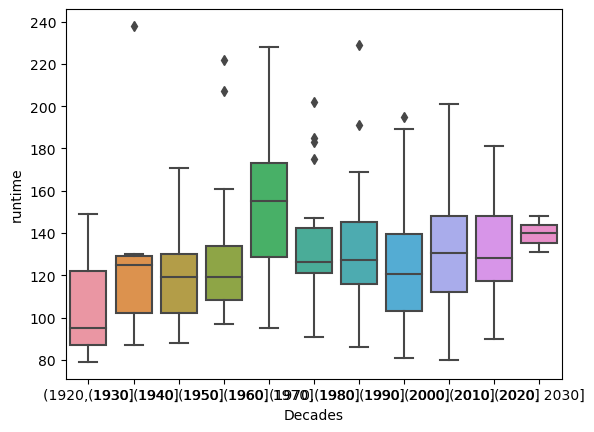

In [51]:
#Identifying Outliers in Movie Runtimes Over the Years
import seaborn as sns
ax = sns.boxplot(x='Decades',y='runtime',data=movie_list)

# Incorporating Oscar and Golden Globe Data

### Oscar dataset import and cleaning

In [52]:
# Import the Oscar csv to analyze
oscar_list = pd.read_csv("the_oscar_award.csv")
print(oscar_list.shape)
oscar_list.head(2)

(10765, 7)


,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True


In [53]:
# Check for NaN values in the film column of the Oscar List
oscar_list["film"].isnull().value_counts()

film
False    10450
True       315
Name: count, dtype: int64

In [54]:
# Drop the NaN values and the "False" winners to clean the data
oscar_list.dropna(how="any", inplace=True)
oscar_winners = oscar_list["winner"]==True

oscars = oscar_list[oscar_winners]
print(oscars.shape)
oscars

(2149, 7)


,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True
10,1927,1928,1,CINEMATOGRAPHY,Karl Struss,Sunrise,True
...,...,...,...,...,...,...,...
10743,2022,2023,95,SOUND,"Mark Weingarten, James H. Mather, Al Nelson, C...",Top Gun: Maverick,True
10745,2022,2023,95,VISUAL EFFECTS,"Joe Letteri, Richard Baneham, Eric Saindon and...",Avatar: The Way of Water,True
10753,2022,2023,95,WRITING (Adapted Screenplay),Screenplay by Sarah Polley,Women Talking,True
10755,2022,2023,95,WRITING (Original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,True


In [55]:
# Count the number of wins each film has and turn that series into a DataFrame
oscar_wins = oscars[["film", "year_film"]].value_counts()
oscar_win_df = oscar_wins.reset_index()
oscar_win_df

,film,year_film,count
0,Titanic,1997,11
1,Ben-Hur,1959,11
2,The Lord of the Rings: The Return of the King,2003,11
3,West Side Story,1961,10
4,The Last Emperor,1987,9
...,...,...,...
1325,Knighty Knight Bugs,1958,1
1326,Kokoda Front Line!,1942,1
1327,Kolya,1996,1
1328,Kon-Tiki,1951,1


In [56]:
# Rename the columns of the DataFrame to cleanly merge with the movie data
oscar_win_df = oscar_win_df.rename(columns={'film': 'Title', 'year_film': 'Year', 'count': 'Oscar_Wins'})
oscar_win_df

,Title,Year,Oscar_Wins
0,Titanic,1997,11
1,Ben-Hur,1959,11
2,The Lord of the Rings: The Return of the King,2003,11
3,West Side Story,1961,10
4,The Last Emperor,1987,9
...,...,...,...
1325,Knighty Knight Bugs,1958,1
1326,Kokoda Front Line!,1942,1
1327,Kolya,1996,1
1328,Kon-Tiki,1951,1


### Golden Globe dataset import and cleaning

In [57]:
# Import the golden globes csv to analyze
gglobe_list = pd.read_csv("golden_globe_awards.csv")
print(gglobe_list.shape)
gglobe_list.head()

# gglobe_list

(7991, 7)


,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [58]:
# Check for NaN values in the film column of the Golden Globe List
gglobe_list["film"].isnull().value_counts()

film
False    6191
True     1800
Name: count, dtype: int64

In [59]:
# Drop the NaN values and the "False" winners to clean the data
gglobe_list.dropna(how="any", inplace=True)
gglobe_winners = gglobe_list["win"]==True
gglobe_winners

gglobes = gglobe_list[gglobe_winners]
print(gglobes.shape)
gglobes

(1400, 7)


,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True
5,1943,1944,1,Actor In A Leading Role,Paul Lukas,Watch On The Rhine,True
...,...,...,...,...,...,...,...
7964,2019,2020,77,Best Performance by an Actor In A Television S...,Brian Cox,Succession,True
7969,2019,2020,77,Best Performance by an Actress in a Television...,Phoebe Waller-Bridge,Fleabag,True
7974,2019,2020,77,Best Performance by an Actor in a Television S...,Ramy Youssef,Ramy,True
7979,2019,2020,77,Best Performance by an Actress in a Supporting...,Patricia Arquette,"Act, The",True


In [61]:
# Count the number of wins each film has and turn that series into a DataFrame
gglobe_count = gglobes[["film", "year_film"]].value_counts()
gglobe_win_df = gglobe_count.reset_index()
gglobe_win_df

,film,year_film,count
0,La La Land,2016,6
1,Midnight Express,1978,5
2,One Flew Over The Cuckoo's Nest,1975,5
3,Lawrence Of Arabia,1962,5
4,"Graduate, The",1967,4
...,...,...,...
1116,Happy Feet,2006,1
1117,"Happy Road, The",1957,1
1118,Happy-Go-Lucky,2008,1
1119,Harry & Tonto,1974,1


In [62]:
# Rename the columns of the DataFrame to cleanly merge with the movie data
gglobe_win_df = gglobe_win_df.rename(columns={'film': 'Title', 'year_film': 'Year', 'count': 'Golden_Globe_Wins'})
gglobe_win_df

,Title,Year,Golden_Globe_Wins
0,La La Land,2016,6
1,Midnight Express,1978,5
2,One Flew Over The Cuckoo's Nest,1975,5
3,Lawrence Of Arabia,1962,5
4,"Graduate, The",1967,4
...,...,...,...
1116,Happy Feet,2006,1
1117,"Happy Road, The",1957,1
1118,Happy-Go-Lucky,2008,1
1119,Harry & Tonto,1974,1


## Merging the Oscars and Golden Globes DataFrames into the Movie List DataFrame

In [63]:
# Referencing the movie_list for ease of coding
print(movie_list.shape)
movie_list.head(1)

(221, 18)


,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades,Budget_Category
0,The Shawshank Redemption,1994,278,tt0111161,"Drama, Crime",142,25000000,28341469,United States of America,124.168,8.703,4.936825e+07,5.596675e+07,6.598499e+06,9.3,"2,802,199","(1990, 2000]",Low Budget


In [64]:
# Individually merge the Oscars and Golden Globes DataFrames into the master movie list
oscar_awards = pd.merge(movie_list, oscar_win_df, how="inner", on=["Title", "Year"])
oscar_awards.head()

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades,Budget_Category,Oscar_Wins
0,The Godfather,1972,238,tt0068646,"Drama, Crime",175,6000000,245066411,United States of America,118.372,8.709,4.200789e+07,1.715787e+09,1.673779e+09,9.2,"1,954,449","(1970, 1980]",Low Budget,3
1,The Dark Knight,2008,155,tt0468569,"Drama, Action, Crime, Thriller",152,185000000,1004558444,"United Kingdom, United States of America",93.061,8.512,2.514650e+08,1.365467e+09,1.114002e+09,9.0,"2,786,837","(2000, 2010]",Average Budget,2
2,The Godfather Part II,1974,240,tt0071562,"Drama, Crime",202,13000000,102600000,United States of America,61.918,8.591,7.717069e+07,6.090548e+08,5.318841e+08,9.0,"1,327,261","(1970, 1980]",Low Budget,6
3,Schindler's List,1993,424,tt0108052,"Drama, History, War",195,22000000,321365567,United States of America,57.346,8.572,4.455647e+07,6.508598e+08,6.063033e+08,9.0,"1,410,062","(1990, 2000]",Low Budget,7
4,The Lord of the Rings: The Return of the King,2003,122,tt0167260,"Adventure, Fantasy, Action",201,94000000,1118888979,"New Zealand, United States of America",82.827,8.474,1.495085e+08,1.779611e+09,1.630103e+09,9.0,"1,920,154","(2000, 2010]",Average Budget,11


In [65]:
both_awards = pd.merge(oscar_awards, gglobe_win_df, how="inner", on=["Title", "Year"])
print(both_awards.shape)
both_awards

(38, 20)


,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades,Budget_Category,Oscar_Wins,Golden_Globe_Wins
0,Schindler's List,1993,424,tt0108052,"Drama, History, War",195,22000000,321365567,United States of America,57.346,8.572,4.455647e+07,6.508598e+08,6.063033e+08,9.0,"1,410,062","(1990, 2000]",Low Budget,7,2
1,The Lord of the Rings: The Return of the King,2003,122,tt0167260,"Adventure, Fantasy, Action",201,94000000,1118888979,"New Zealand, United States of America",82.827,8.474,1.495085e+08,1.779611e+09,1.630103e+09,9.0,"1,920,154","(2000, 2010]",Average Budget,11,3
2,Pulp Fiction,1994,680,tt0110912,"Thriller, Crime",154,8500000,213900000,United States of America,79.178,8.488,1.678521e+07,4.223948e+08,4.056096e+08,8.9,"2,151,243","(1990, 2000]",Low Budget,1,1
3,Forrest Gump,1994,13,tt0109830,"Comedy, Drama, Romance",142,55000000,677387716,United States of America,62.719,8.477,1.086102e+08,1.337658e+09,1.229048e+09,8.8,"2,183,967","(1990, 2000]",Low Budget,6,2
4,Saving Private Ryan,1998,857,tt0120815,"Drama, History, War",169,70000000,481840909,United States of America,52.884,8.209,1.256801e+08,8.651114e+08,7.394313e+08,8.6,"1,452,795","(1990, 2000]",Low Budget,5,1
5,Gladiator,2000,98,tt0172495,"Action, Drama, Adventure",155,103000000,465361176,"United Kingdom, United States of America",60.281,8.209,1.750492e+08,7.908843e+08,6.158351e+08,8.5,"1,566,334","(1990, 2000]",Average Budget,5,2
6,Whiplash,2014,244786,tt2582802,"Drama, Music",107,3300000,13092000,United States of America,55.515,8.381,4.079487e+06,1.618444e+07,1.210495e+07,8.5,"935,843","(2010, 2020]",Low Budget,3,1
7,Apocalypse Now,1979,28,tt0078788,"Drama, War",147,31500000,150000000,United States of America,33.804,8.284,1.269784e+08,6.046591e+08,4.776807e+08,8.4,"693,232","(1970, 1980]",Low Budget,2,3
8,Django Unchained,2012,68718,tt1853728,"Drama, Western",165,100000000,425368238,United States of America,42.09,8.171,1.274663e+08,5.422012e+08,4.147349e+08,8.5,"1,638,564","(2010, 2020]",Low Budget,2,2
9,American Beauty,1999,14,tt0169547,Drama,122,15000000,356296601,United States of America,28.352,8.021,2.634949e+07,6.258822e+08,5.995328e+08,8.3,"1,187,726","(1990, 2000]",Low Budget,5,2


In [66]:
gglobe_awards = pd.merge(movie_list, gglobe_win_df, how="inner", on=["Title", "Year"])
gglobe_awards

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades,Budget_Category,Golden_Globe_Wins
0,Schindler's List,1993,424,tt0108052,"Drama, History, War",195,22000000,321365567,United States of America,57.346,8.572,4.455647e+07,6.508598e+08,6.063033e+08,9.0,"1,410,062","(1990, 2000]",Low Budget,2
1,The Lord of the Rings: The Return of the King,2003,122,tt0167260,"Adventure, Fantasy, Action",201,94000000,1118888979,"New Zealand, United States of America",82.827,8.474,1.495085e+08,1.779611e+09,1.630103e+09,9.0,"1,920,154","(2000, 2010]",Average Budget,3
2,Pulp Fiction,1994,680,tt0110912,"Thriller, Crime",154,8500000,213900000,United States of America,79.178,8.488,1.678521e+07,4.223948e+08,4.056096e+08,8.9,"2,151,243","(1990, 2000]",Low Budget,1
3,Forrest Gump,1994,13,tt0109830,"Comedy, Drama, Romance",142,55000000,677387716,United States of America,62.719,8.477,1.086102e+08,1.337658e+09,1.229048e+09,8.8,"2,183,967","(1990, 2000]",Low Budget,2
4,Saving Private Ryan,1998,857,tt0120815,"Drama, History, War",169,70000000,481840909,United States of America,52.884,8.209,1.256801e+08,8.651114e+08,7.394313e+08,8.6,"1,452,795","(1990, 2000]",Low Budget,1
5,Psycho,1960,539,tt0054215,"Horror, Drama, Thriller",109,806947,32000000,United States of America,41.575,8.435,7.978280e+06,3.163838e+08,3.084055e+08,8.5,"700,356","(1950, 1960]",Low Budget,1
6,Gladiator,2000,98,tt0172495,"Action, Drama, Adventure",155,103000000,465361176,"United Kingdom, United States of America",60.281,8.209,1.750492e+08,7.908843e+08,6.158351e+08,8.5,"1,566,334","(1990, 2000]",Average Budget,2
7,Whiplash,2014,244786,tt2582802,"Drama, Music",107,3300000,13092000,United States of America,55.515,8.381,4.079487e+06,1.618444e+07,1.210495e+07,8.5,"935,843","(2010, 2020]",Low Budget,1
8,Apocalypse Now,1979,28,tt0078788,"Drama, War",147,31500000,150000000,United States of America,33.804,8.284,1.269784e+08,6.046591e+08,4.776807e+08,8.4,"693,232","(1970, 1980]",Low Budget,3
9,Django Unchained,2012,68718,tt1853728,"Drama, Western",165,100000000,425368238,United States of America,42.09,8.171,1.274663e+08,5.422012e+08,4.147349e+08,8.5,"1,638,564","(2010, 2020]",Low Budget,2


In [ ]:
# # Merging the oscar list and golden globe list
# merged_awards_df = pd.merge(oscar_list, gglobe_list, how="left", on=["film", "year_film"])
# print(merged_awards_df.shape)
# merged_awards_df.sample(5)

In [ ]:
# # Cleaning the data by dropping unneeded columns
# merged_awards_df = merged_awards_df[["film", "year_film", "winner", "win", "name", "nominee"]]
# merged_awards_df = merged_awards_df.rename(columns={'film': 'Title', 'year_film': 'Year', 'winner': 'Oscar_winner',
#                                                    'win': 'Golden_Globe_winner', 'name': 'Oscar_nominee',
#                                                    'nominee': 'Golden_Globe_nominee'})
# merged_awards_df

### Pulling genre and produciton country information out of the DataFrame

In [ ]:
# # This will split a cell with multiple values back into a list
# newvar = movie_list.loc[9, "production_countries"].split(", ")
# newvar[2]

In [ ]:
# # Testing the Pandas "explode" function
# checkexplode = movie_list["genres"].explode('drama')
# checkexplode

In [ ]:
# Create a "contains value" function in Python to call on to pull specific genre or production country information
def contains_value(val, search_val):
    return search_val in val.split(', ')

In [ ]:
# crime_df = movie_list[movie_list['genres'].apply(lambda x: contains_value(x, 'Crime'))]
# drama_df = movie_list[movie_list['genres'].apply(lambda x: contains_value(x, 'Drama'))]


# # merge1_df = pd.merge(crime_df, drama_df, on=["Title", "Year", "id", "budget", "revenue", "popularity"])
# # merge1_df
# # merge1_df.groupby["Year"]
# # merge1_df

In [ ]:
# # Creating empty lists to split multiple-value columns' values into
# genre_list = []
# prod_country_list = []

# for index, row in movie_list.iterrows():
#     genre_list.append(movie_list.loc[index, "genres"].split(", "))
#     prod_country_list.append(movie_list.loc[index, "production_countries"])

# genre_df = pd.DataFrame(genre_list)
# prod_country_df = pd.DataFrame(prod_country_list)
# genre_df